In [0]:
import cv2
import numpy as np
import imutils
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


def url_to_image(url):
#   print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url_1 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count1.jpg"
url_2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count2.jpg"
url_3 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count3.jpg"
url_4 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count4.jpg"
url_5 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count5.jpg"
url_6 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count6.jpg"
url_7 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count7.jpg"
url_8 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count8.jpg"
url_9 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count9.jpg"
url_10 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count10.jpg"
url_11 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count11.jpg"
url_12 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count12.jpg"


urls = [url_1, url_2, url_3, url_4, url_5, url_6, url_7, url_8, url_9, url_10, url_11, url_12]

In [0]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage


def calculate_labels(thresh, min_distance):
  D = ndimage.distance_transform_edt(thresh)
  # plt.imshow(D)

  localMax = peak_local_max(D, indices=False, min_distance=min_distance, labels=thresh)
 
  # perform a connected component analysis on the local peaks,
  # using 8-connectivity, then appy the Watershed algorithm
  markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
  labels = watershed(-D, markers, mask=thresh)
  print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

  label_hue = np.uint8(179*labels/np.max(labels))
  blank_ch = 255*np.ones_like(label_hue)
  labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

  # cvt to BGR for display
  labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

  # set bg label to black
  labeled_img[label_hue==0] = 0
  return labeled_img, labels

# labeled_img, labels = calculateLabels(thresh, 20)
#cv2_imshow(img)
# cv2_imshow(thresh)
# cv2_imshow(labeled_img)

In [0]:
# loop over the unique labels returned by the Watershed
# algorithm
image = url_to_image(url_1)

def draw_circles(image, labels):
  for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
    if label == 0:
		  continue
 
	# otherwise, allocate memory for the label region and draw
	# it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255 
	#cv2_imshow(mask)#[labels == label] = 255   
  # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
 
	 # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
 

[INFO] 522 unique segments found


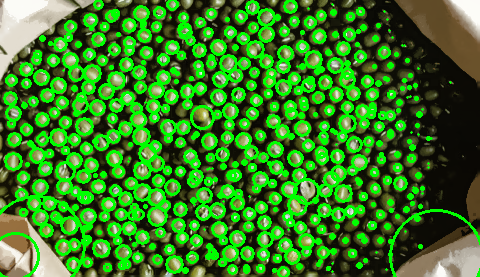

In [8]:
#image_1
img = url_to_image(url_1)
img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 120, 255,
	cv2.THRESH_BINARY)[1]

kernel = np.ones((5,5), np.uint8) 
# thresh = cv2.erode(thresh, kernel, iterations=1) 
# thresh = cv2.dilate(thresh, kernel, iterations=1) 

# cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 5)
draw_circles(img, labels)
cv2_imshow(img)
  


[INFO] 141 unique segments found


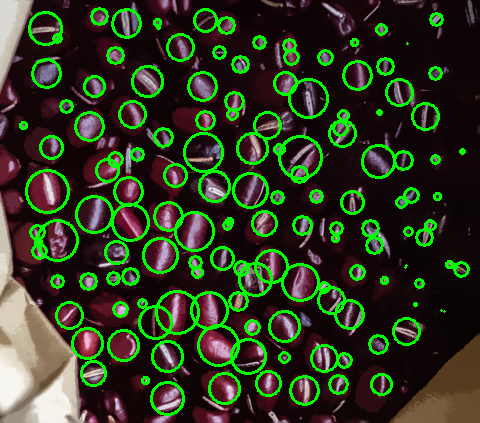

In [9]:
#image_2
img = url_to_image(url_2)
img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 50, 255,
	cv2.THRESH_BINARY)[1]

kernel = np.ones((5,5), np.uint8) 
# thresh = cv2.erode(thresh, kernel, iterations=1) 
# thresh = cv2.dilate(thresh, kernel, iterations=1) 

# cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 15)
draw_circles(img, labels)
cv2_imshow(img)

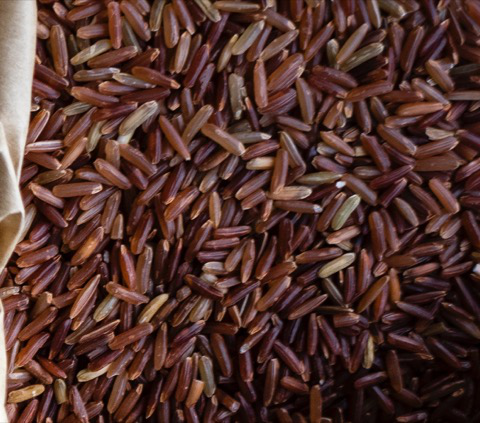

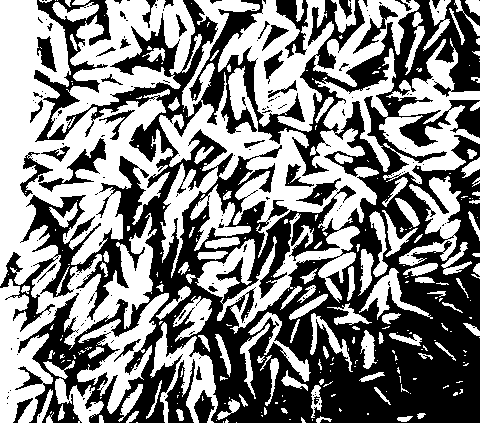

[INFO] 329 unique segments found


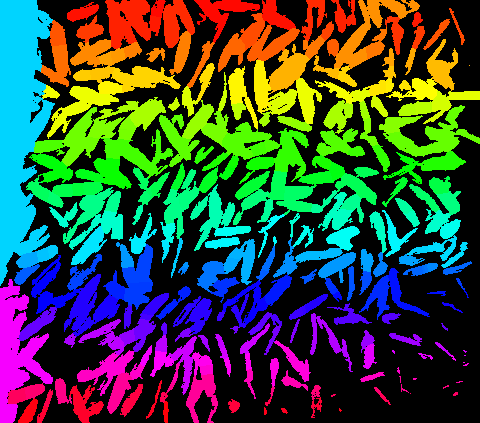

In [27]:
#image_3
img = url_to_image(url_3)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 50, 255,cv2.THRESH_BINARY)[1]
# thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
kernel = np.ones((5,5), np.uint8) 
# thresh = cv2.erode(thresh, kernel, iterations=1) 
# thresh = cv2.dilate(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 10)
draw_circles(img, labels)
cv2_imshow(labeled_img)
# cv2_imshow(img)

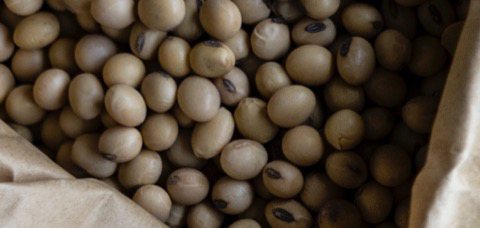

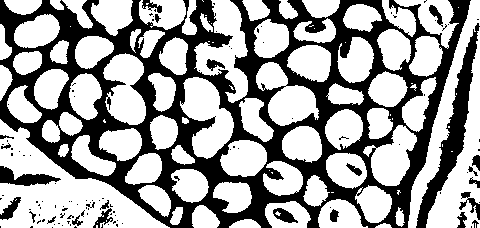

[INFO] 71 unique segments found


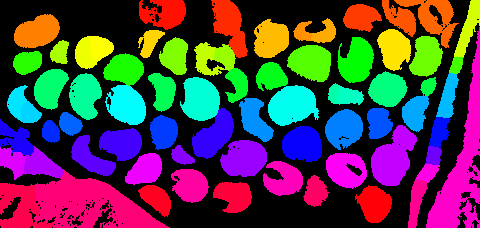

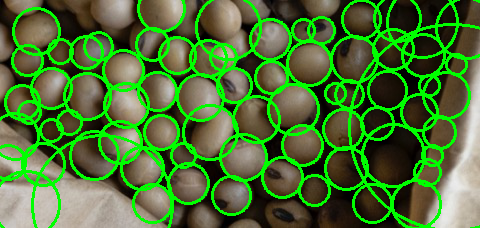

In [39]:
#image_4
img = url_to_image(url_4)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 80, 255,cv2.THRESH_BINARY)[1]
thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)
kernel = np.ones((5,5), np.uint8) 
# thresh = cv2.erode(thresh, kernel, iterations=1) 
# thresh = cv2.dilate(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 15)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

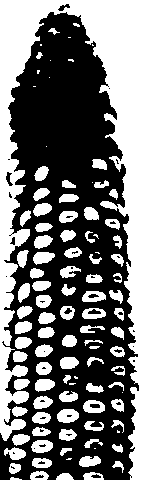

[INFO] 102 unique segments found


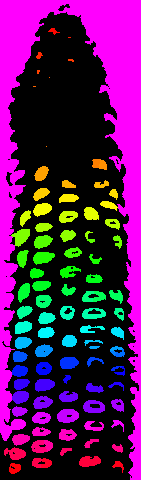

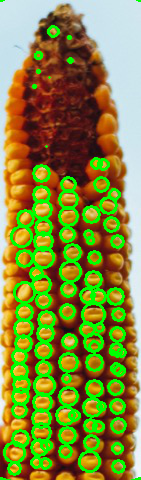

In [46]:
#image_5
img = url_to_image(url_5)
# cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 130, 255,cv2.THRESH_BINARY)[1]
# thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)
kernel = np.ones((5,5), np.uint8) 
# thresh = cv2.erode(thresh, kernel, iterations=1) 
# thresh = cv2.dilate(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 10)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

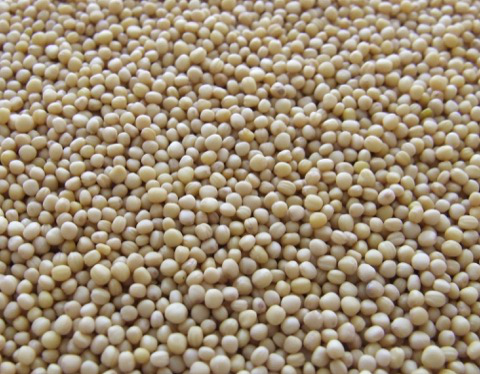

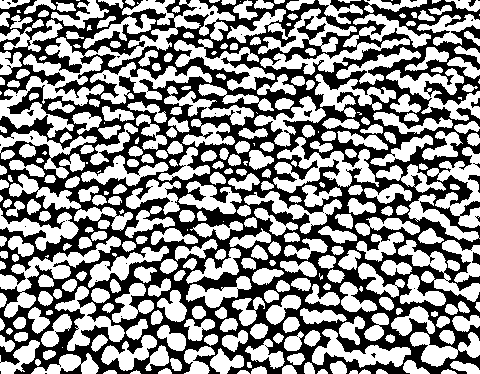

[INFO] 832 unique segments found


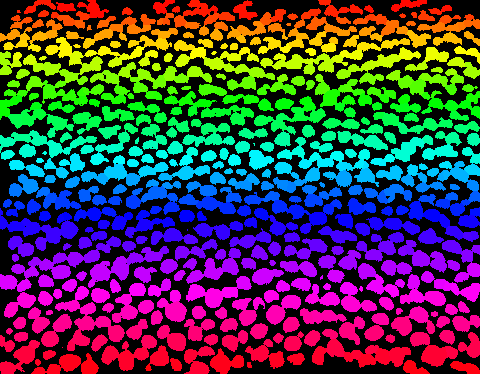

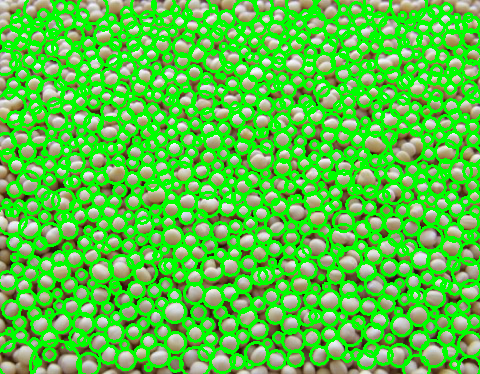

In [50]:
#image_6
img = url_to_image(url_6)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 130, 255,cv2.THRESH_BINARY)[1]
thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)
kernel = np.ones((5,5), np.uint8) 
# thresh = cv2.erode(thresh, kernel, iterations=1) 
# thresh = cv2.dilate(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 5)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

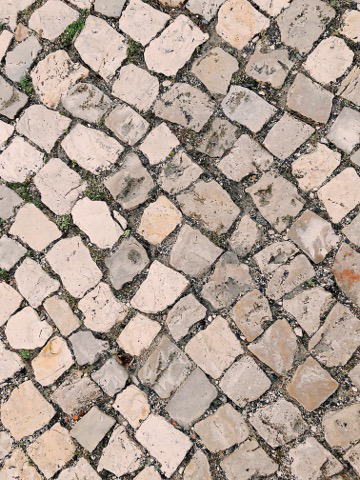

[INFO] 78 unique segments found


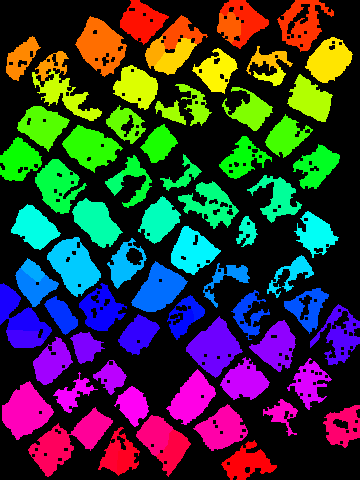

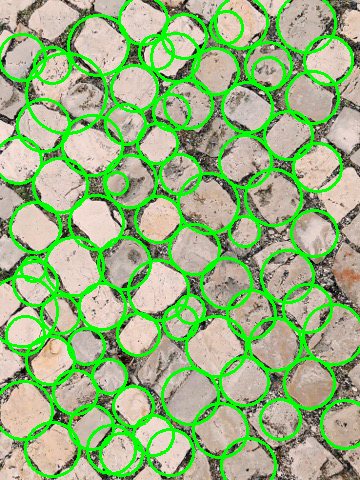

In [87]:
#image_7
img = url_to_image(url_7)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 150, 255,cv2.THRESH_BINARY)[1]
# thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)
kernel = np.ones((3,3), np.uint8) 
thresh = cv2.erode(thresh, kernel, iterations=1) 
# thresh = cv2.dilate(thresh, kernel, iterations=1) 

# cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 18)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

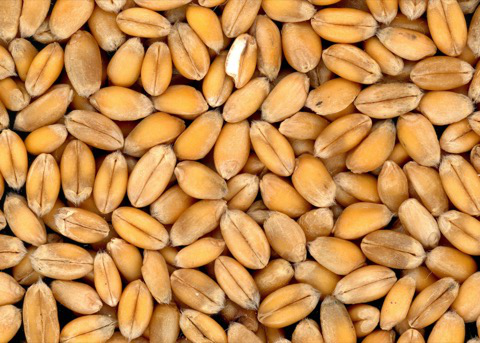

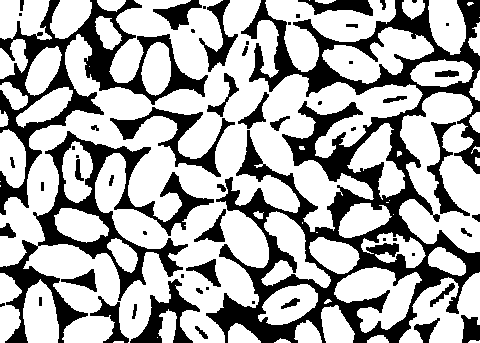

[INFO] 98 unique segments found


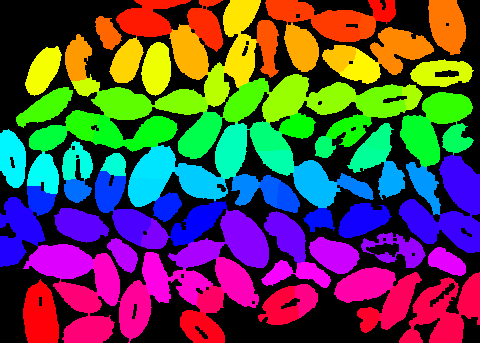

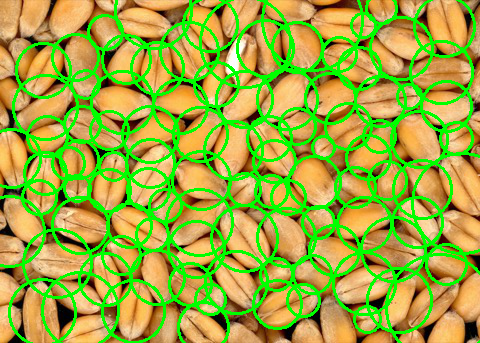

In [128]:
#image_8
img = url_to_image(url_8)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 150, 255,cv2.THRESH_BINARY)[1]
# thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)
kernel = np.ones((3,3), np.uint8) 

thresh = cv2.dilate(thresh, kernel, iterations=1)
thresh = cv2.erode(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 15)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

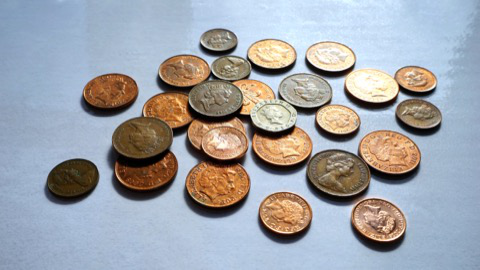

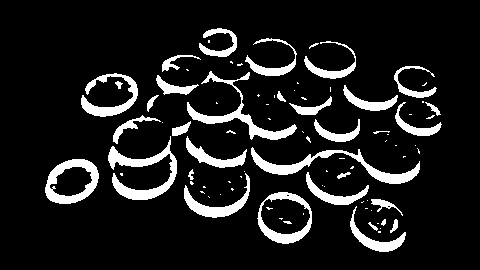

[INFO] 39 unique segments found


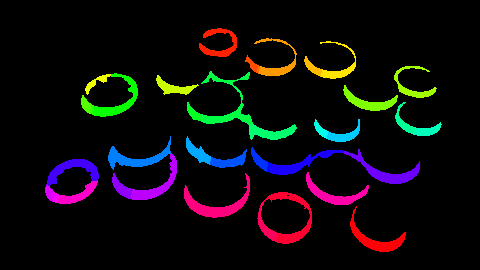

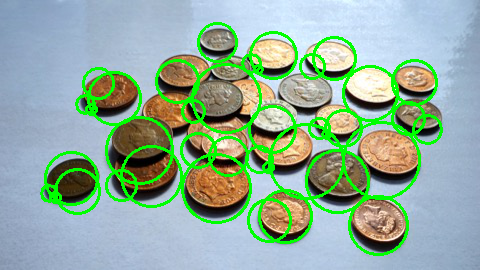

In [146]:
#image_9
img = url_to_image(url_9)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 120, 255,cv2.cv2.THRESH_BINARY_INV)[1]
gray = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 25)
kernel = np.ones((5,5), np.uint8) 

# thresh = cv2.dilate(thresh, kernel, iterations=1)
# thresh = cv2.erode(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 25)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

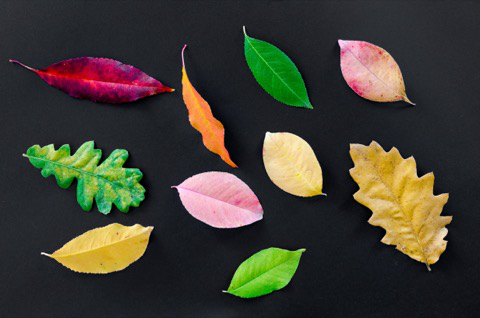

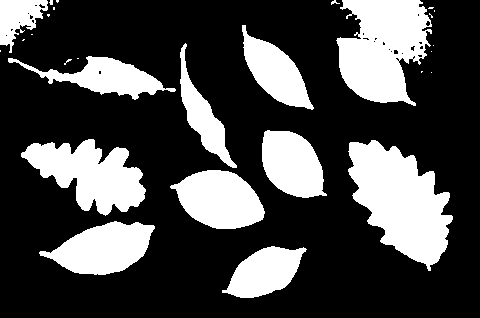

[INFO] 10 unique segments found


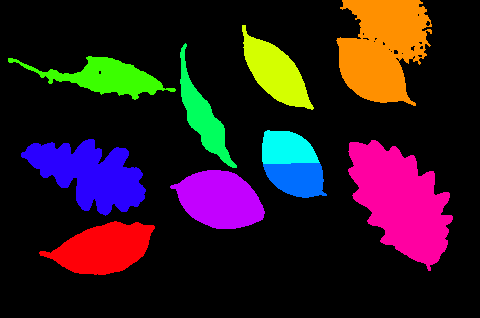

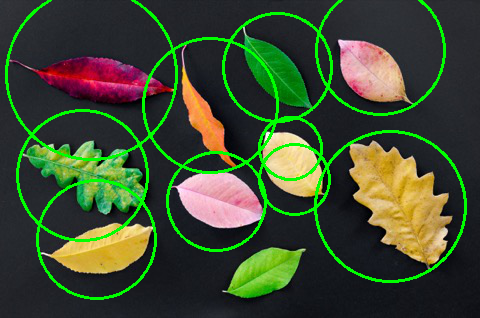

In [160]:
#image_10
img = url_to_image(url_10)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.threshold(gray, 45, 255,cv2.cv2.THRESH_BINARY)[1]
# thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 11)
kernel = np.ones((5,5), np.uint8) 

# thresh = cv2.dilate(thresh, kernel, iterations=1)
# thresh = cv2.erode(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 50)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

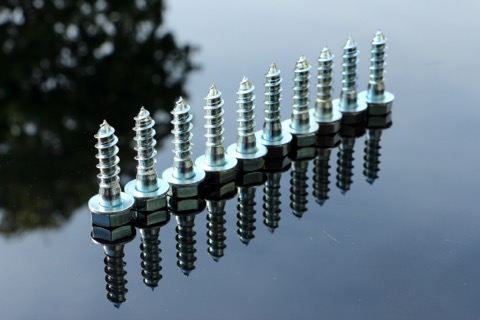

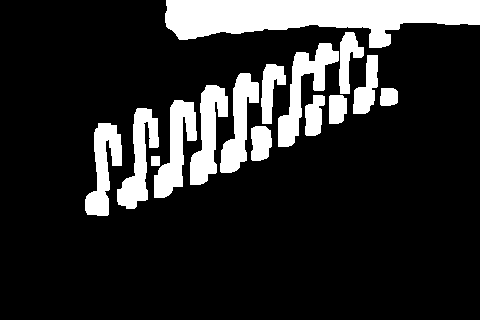

[INFO] 7 unique segments found


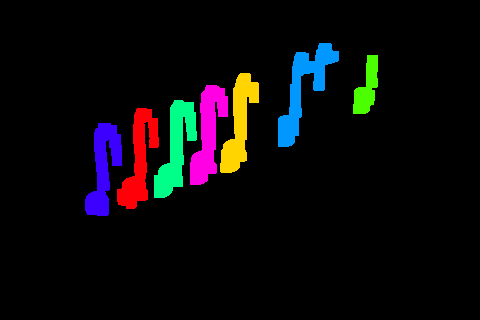

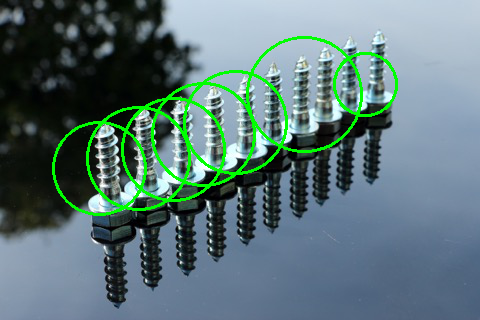

In [204]:
#image_11
img = url_to_image(url_11)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.threshold(gray, 200, 255,cv2.cv2.THRESH_BINARY)[1]
# thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 31)
kernel = np.ones((5,5), np.uint8) 

thresh = cv2.dilate(thresh, kernel, iterations=2)
# thresh = cv2.erode(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 38)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)

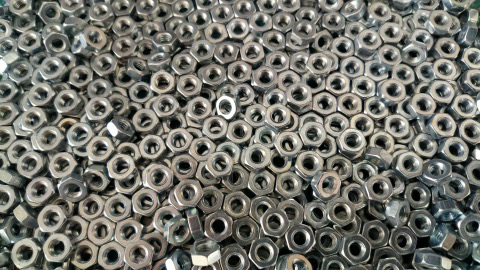

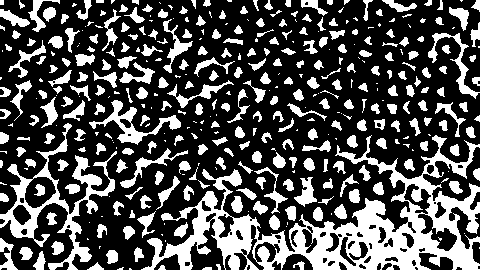

[INFO] 296 unique segments found


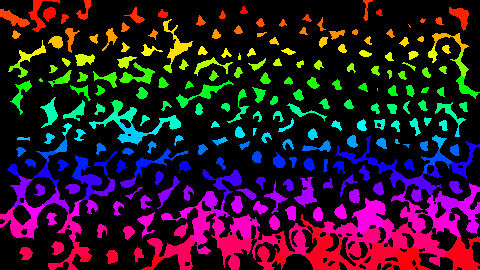

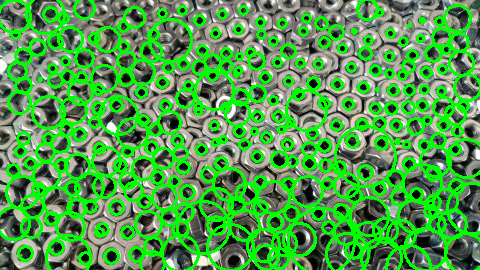

In [222]:
#image_12
img = url_to_image(url_12)
cv2_imshow(img)
# img = cv2.pyrMeanShiftFiltering(img, 21, 21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.threshold(gray, 100, 255,cv2.cv2.THRESH_BINARY_INV)[1]
# thresh = cv2.adaptiveThreshold(gray, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)
kernel = np.ones((2,2), np.uint8) 

# thresh = cv2.dilate(thresh, kernel, iterations=2)
thresh = cv2.erode(thresh, kernel, iterations=1) 

cv2_imshow(thresh)

labeled_img, labels = calculate_labels(thresh, 10)
draw_circles(img, labels)
cv2_imshow(labeled_img)
cv2_imshow(img)